In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [3]:
ford = pd.read_csv("ford.csv")
data = ford.copy()

In [5]:
data.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,145,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [9]:
data = data.drop(["model","transmission","fuelType"], axis=1)

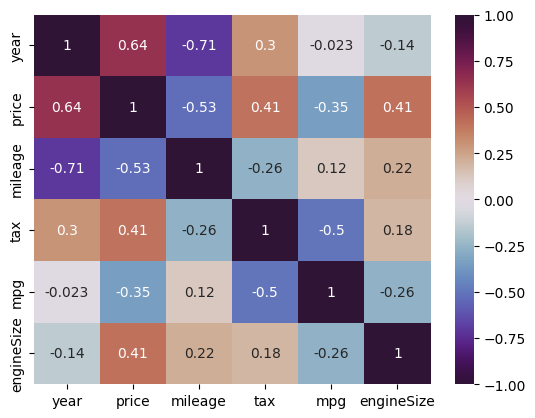

In [10]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="twilight_shifted");

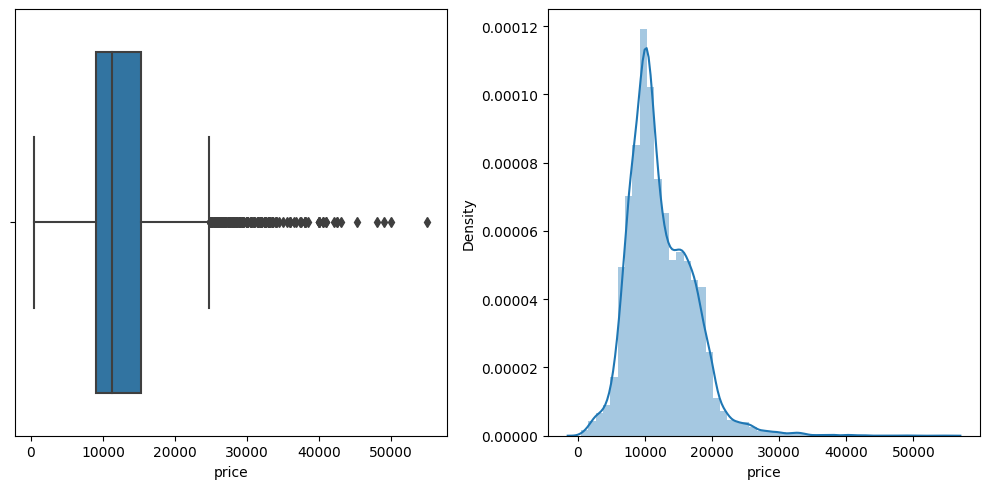

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x="price")
plt.subplot(1, 2, 2)
sns.distplot(data.price);
plt.tight_layout()
plt.show()

In [12]:
lof = LocalOutlierFactor(n_neighbors=30)
lof.fit_predict(data)

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
lof_scores = lof.negative_outlier_factor_
scores = np.sort(-lof_scores[:])

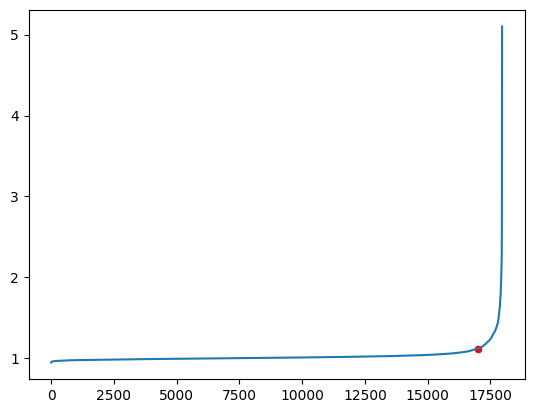

In [14]:
sns.lineplot(x=np.arange(len(scores)), y=scores);
sns.scatterplot(x=[17000], y=scores[17000], color="red");

In [15]:
esik_deger = -scores[17000]
aykiri_degerler = lof_scores > esik_deger
data = data[aykiri_degerler]

In [16]:
data = data[data["price"]<23500]

In [17]:
data.groupby("year")["price"].agg(["mean", "count"])

,mean,count
year,,
2002,1545.000000,2
2003,1695.000000,1
2004,1647.000000,2
2005,1582.111111,9
2006,1951.800000,5
2007,2710.294118,17
2008,2676.653846,26
2009,3481.113636,44
2010,4199.960000,50


In [18]:
data = data[data["year"] != 2060]

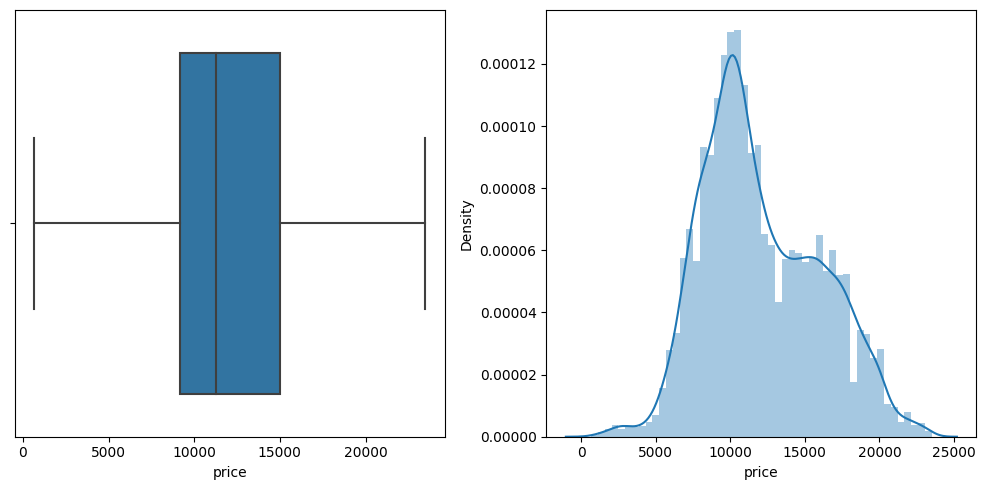

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x="price")
plt.subplot(1, 2, 2)
sns.distplot(data.price);
plt.tight_layout()
plt.show()

In [20]:
X = data.drop(["price"], axis=1)
y = data[["price"]]
X.shape, y.shape

((16762, 5), (16762, 1))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=24)

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
earlyStop = EarlyStopping(monitor="val_loss", mode="min", patience=25, verbose=1)

In [24]:
model = Sequential()

model.add(Dense(units=10, activation="relu"))
model.add(Dropout(.3))
model.add(Dense(units=10, activation="relu"))
model.add(Dropout(.3))
model.add(Dense(units=10, activation="relu"))
model.add(Dropout(.3))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [25]:
model.fit(x=X_train, y=y_train, batch_size=250, epochs=300, validation_data=(X_test, y_test), callbacks=[earlyStop])

Epoch 1/300
51/51 [==============================] - 1s 4ms/step - loss: 161012112.0000 - val_loss: 161851744.0000
Epoch 2/300
51/51 [==============================] - 0s 2ms/step - loss: 160991600.0000 - val_loss: 161813616.0000
Epoch 3/300
51/51 [==============================] - 0s 2ms/step - loss: 160903536.0000 - val_loss: 161642016.0000
Epoch 4/300
51/51 [==============================] - 0s 2ms/step - loss: 160596720.0000 - val_loss: 161106048.0000
Epoch 5/300
51/51 [==============================] - 0s 2ms/step - loss: 159812288.0000 - val_loss: 159811312.0000
Epoch 6/300
51/51 [==============================] - 0s 2ms/step - loss: 158109072.0000 - val_loss: 157024848.0000
Epoch 7/300
51/51 [==============================] - 0s 2ms/step - loss: 154745488.0000 - val_loss: 151882160.0000
Epoch 8/300
51/51 [==============================] - 0s 2ms/step - loss: 148963264.0000 - val_loss: 143573104.0000
Epoch 9/300
51/51 [==============================] - 0s 2ms/step - loss: 1401320

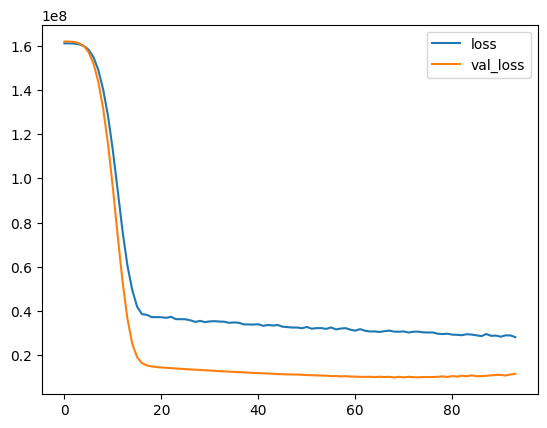

In [26]:
loss = pd.DataFrame(model.history.history)[["loss","val_loss"]]
loss.plot();

In [27]:
model.evaluate(X_train, y_train)

393/393 [==============================] - 0s 908us/step - loss: 10002973.0000


10002973.0

In [28]:
model.evaluate(X_test, y_test)

131/131 [==============================] - 0s 878us/step - loss: 11666088.0000


11666088.0

In [29]:
y_pred = model.predict(X_test)

131/131 [==============================] - 0s 812us/step


In [30]:
mean_absolute_error(y_test, y_pred)

2736.4937799772765